In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import Planck15 as cosmo

# adding path to GPR_for_IM directory in order to import relevant scripts
import sys
sys.path.append('../')
import pk_tools as pk
import obs_tools as obs

### Loading HI Data
Load in the unsmoothed HI data and calculate the power spectrum

In [3]:
HI_unsmoothed = np.load('../Data/T_HI-MDSAGE_z_0.39.npy')
HI_unsmoothed = np.swapaxes(HI_unsmoothed, 1, 2)

In [4]:
# Dimension of data cube:
lx,ly,lz = 1000,1000, 924.78 #Mpc/h
nx,ny,nz = 256, 256, 285
# Measure the auto-power spectrum, with noise:
kmin = 2*np.pi/pow(lx*ly*lz, 1/3)
kmax= 1
dk = 2*kmin
nkbin = int((kmax-kmin)/dk)
kbins = np.arange(kmin,kmax,dk)
k = np.linspace(kmin+0.5*dk,kmax-0.5*dk,nkbin)
# weighting and window function:
w = W = np.ones((nx,ny,nz))

In [5]:
# calculate power spectrum:
pk_HI_unsmoothed = pk.getpk(HI_unsmoothed,w,W,nx,ny,nz,lx,ly,lz,kbins)[0]

### Smoothing the data with telescope beam
And plotting power spectra to compare

In [6]:
zmax = 0.58
sigma_beam = 1.55
HI_smoothed = obs.ConvolveCube(HI_unsmoothed,zmax,lx,ly,sigma_beam, cosmo)
# note: running the ConvolveCube function changes the original HI_unsmoothed map, so
# don't run it more than once!

In [7]:
# calculate power spectrum:
pk_HI_smoothed = pk.getpk(HI_smoothed,w,W,nx,ny,nz,lx,ly,lz,kbins)[0]

Text(0.5, 0, 'k [h/Mpc]')

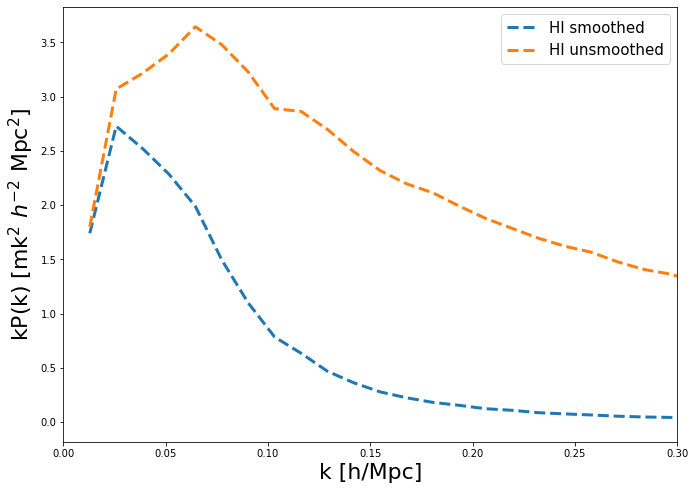

In [8]:
plt.figure(figsize=(11,8))

plt.plot(k, (k*pk_HI_smoothed),ls='--', lw=3, label = r'HI smoothed')
plt.plot(k, (k*pk_HI_unsmoothed),ls='--', lw=3, label = r'HI unsmoothed')

plt.legend(fontsize=15)
plt.xlim(0,0.3)
plt.ylabel(r'kP(k) [mk$^2$ $h^{-2}$ Mpc$^2$]', fontsize=22)
plt.xlabel('k [h/Mpc]', fontsize=22)